In [180]:
import pandas as pd 
import seaborn as sns 
import datetime

covid_df = pd.read_csv("owid-covid-data.csv")

In [5]:
#  Si richiede di verificare le dimensioni del dataset e i relativi metadati;

covid_df.shape


(388906, 67)

In [274]:
covid_df.columns
covid_df.continent.value_counts()


continent
Africa           87838
Europe           83905
Asia             76808
North America    63204
Oceania          36989
South America    21578
Name: count, dtype: int64

In [286]:
# si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di
# non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

covid_df.sample(5)

describe_continents = covid_df.groupby("continent").describe()

describe_continents = describe_continents["total_cases"]


In [8]:
# casi per continente 
casi_tot_x_continente = covid_df.groupby("continent")["total_cases"].max()
casi_tot_x_continente = casi_tot_x_continente.to_frame()

casi_tot_x_continente

,total_cases
continent,
Africa,4072636.0
Asia,99345680.0
Europe,38997490.0
North America,103436829.0
Oceania,11817320.0
South America,37519960.0


In [9]:
# casi mondiali
world_case = casi_tot_x_continente.total_cases.sum()

world_case

295189915.0

In [287]:
# Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne
# confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali
# nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

continente1 = "Asia"
continente2 =  "Europe"

filtro_continenti = (covid_df.continent == continente1) | (covid_df.continent == continente2)  

filtro_continenti = covid_df.loc[filtro_continenti]

filtro_continenti= filtro_continenti.loc[:,["continent","total_cases"]]

test = describe_continents.loc[continente1]
test2 = describe_continents.loc[continente2]

# converto in dataframe il mio raggruppamento 
df_continenti_raggruppati = filtro_continenti.groupby("continent")["total_cases"].max()


df_continenti_raggruppati = df_continenti_raggruppati.to_frame()
df_continenti_raggruppati = df_continenti_raggruppati.reset_index()
df_continenti_raggruppati["world_cases"]= world_case
df_descrittori = df_continenti_raggruppati.set_index("continent").transpose()


df_descrittori1 = df_descrittori[continente1].describe()
df_descrittori2 = df_descrittori[continente2].describe()

descrittore_statistico1 = {
    'Massimo': test.max(),
    'Media': test.mean(),
    'Percentuale sul totale mondiale': (df_descrittori.iloc[0,[0]] / world_case) * 100
}


descrittore_statistico2 = {
    'Massimo': test2.max(),
    'Media': test2.mean(),
    'Percentuale sul totale mondiale': (df_descrittori.iloc[0,[1]] / world_case) * 100 
}

In [291]:
descrittore_statistico1, descrittore_statistico2
#describe_continents.loc["Asia"]

({'Massimo': 99345680.0,
  'Media': 14386835.6537807,
  'Percentuale sul totale mondiale': continent
  Asia    33.654835
  Name: total_cases, dtype: float64},
 {'Massimo': 38997490.0,
  'Media': 6306380.96017506,
  'Percentuale sul totale mondiale': continent
  Europe    13.210983
  Name: total_cases, dtype: float64})

In [281]:
test

total_cases                              count    6.627900e+04
                                         mean     3.199745e+06
                                         std      1.052156e+07
                                         min      1.000000e+00
                                         25%      5.911300e+04
                                                      ...     
excess_mortality_cumulative_per_million  min     -6.671582e+02
                                         25%      3.473626e+01
                                         50%      7.442194e+02
                                         75%      1.519889e+03
                                         max      8.306197e+03
Name: Asia, Length: 496, dtype: float64

In [12]:
df_descrittori

continent,Asia,Europe
total_cases,99345680.0,38997490.0
world_cases,295189915.0,295189915.0


C:\Users\HOME\AppData\Local\Temp\ipykernel_21688\351572910.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italia_2022["month"] = df_italia.date.dt.month


<Axes: xlabel='month', ylabel='total_cases'>

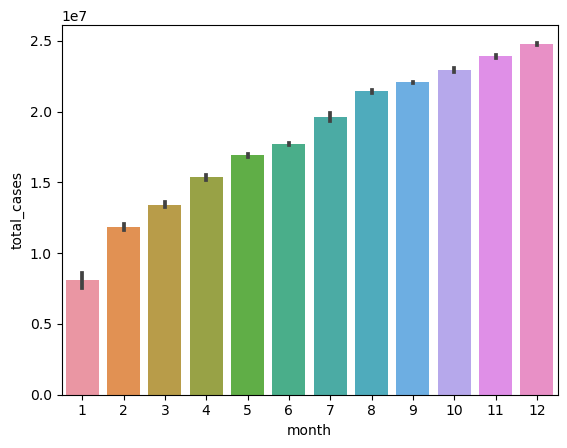

In [81]:
#• Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.

covid_df.date = pd.to_datetime(covid_df.date)

filtro_italia = covid_df.location == "Italy"

df_italia = covid_df.loc[filtro_italia]
filtro_2022 = df_italia.date.dt.year == 2022 

df_italia_2022 = df_italia.loc[filtro_2022]

df_italia_2022["month"] = df_italia.date.dt.month

df_italia.loc[filtro_2022]

sns.barplot(data=df_italia_2022, x="month", y="total_cases")

In [21]:
covid_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

<Axes: xlabel='month', ylabel='new_cases'>

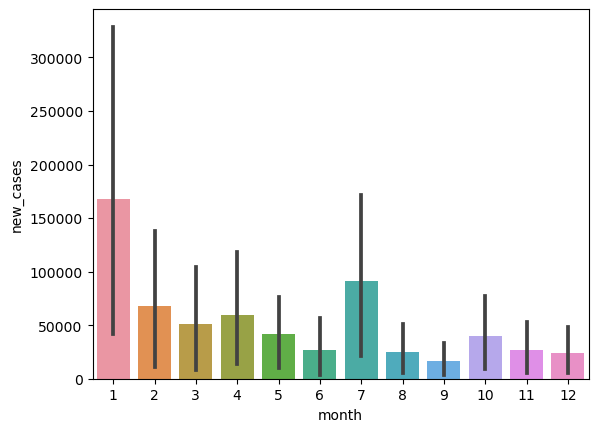

In [109]:
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
sns.barplot(data=df_italia_2022, x="month", y="new_cases")

<Axes: xlabel='month'>

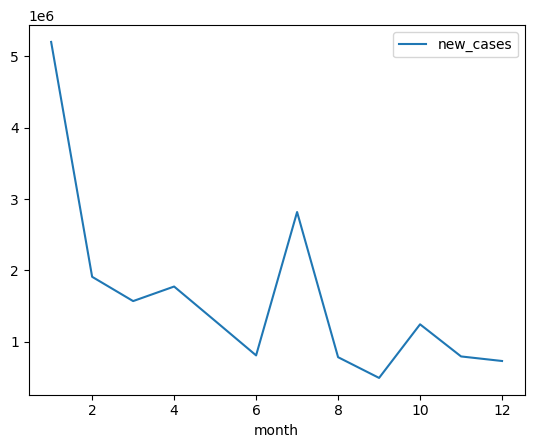

In [140]:
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci
#sono similarità con l'andamento del numero dei casi totali;

more_then = df_italia_2022["new_cases"] > 0 
months = df_italia_2022.loc[more_then]

sum_cum = months.groupby("month").new_cases.sum().to_frame()

sum_cum.plot()

In [ ]:
#• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il
#numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e
#scrivere un breve commento a riguardo;

C:\Users\HOME\AppData\Local\Temp\ipykernel_21688\3776936304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_i_g.date = pd.to_datetime(f_i_g.date)


<Axes: xlabel='location', ylabel='icu_patients'>

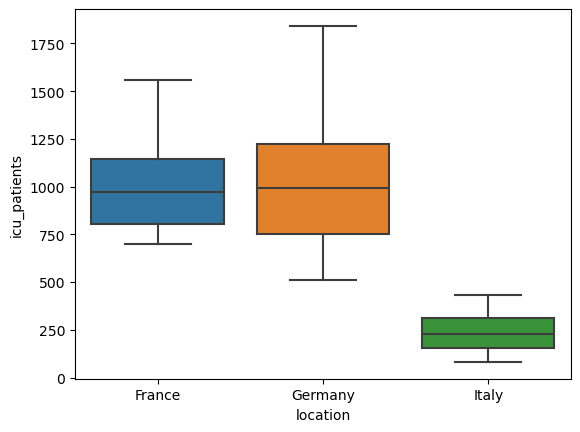

In [213]:
filtro_paesi = (covid_df.location == "Italy") | (covid_df.location == "France") | (covid_df.location == "Germany")

f_i_g = covid_df.loc[filtro_paesi]

f_i_g.date = pd.to_datetime(f_i_g.date)

start_date = pd.to_datetime("2022-5-1") 
end_date = pd.to_datetime("2023-4-30")
mask = (f_i_g.date >= start_date) & (f_i_g.date <= end_date)


df_fr_it_ge_time_ok = f_i_g.loc[mask]

sns.boxplot(data=df_fr_it_ge_time_ok, x="location", y="icu_patients")


In [209]:
df_fr_it_ge_time_ok

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
117873,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,89517.72,6.19,6.24,1385.1523
117874,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117875,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117876,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117877,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167549,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167550,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167551,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167552,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


In [264]:
#• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per
#ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

df_f_g_i = covid_df.loc[filtro_paesi]
df_f_g_i.date = pd.to_datetime(df_f_g_i.date)

filtro_2023 = df_f_g_i.date.dt.year == 2023 

df_f_g_i_ok = df_f_g_i.loc[filtro_2023]

df_f_g_i_ok = df_f_g_i_ok[["continent","location","total_cases","hosp_patients", "date"]]

hosp_cases = df_f_g_i.groupby("location")["hosp_patients"].sum()

C:\Users\HOME\AppData\Local\Temp\ipykernel_21688\2231298193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f_g_i.date = pd.to_datetime(df_f_g_i.date)


In [272]:

mask_null = df_f_g_i_ok[df_f_g_i_ok['hosp_patients'].isnull()] 


In [273]:
mask_null

# aggiungere un dato è pericoloso in questo caso, si potrebbe aggiungere caso per caso facendo ricerce sul web per capire se i dati sono coerenti 
# oppure si potrebbe sottrarre i pazienti che entrano in giorni successivi e aggiunre il numero a hosp_patients 

,continent,location,total_cases,hosp_patients,date
118208,Europe,France,38588428.0,NaN,2023-04-01
118209,Europe,France,38645710.0,NaN,2023-04-02
118210,Europe,France,38645710.0,NaN,2023-04-03
118211,Europe,France,38645710.0,NaN,2023-04-04
118212,Europe,France,38645710.0,NaN,2023-04-05
...,...,...,...,...,...
127724,Europe,Germany,38437756.0,NaN,2023-12-27
127725,Europe,Germany,38437756.0,NaN,2023-12-28
127726,Europe,Germany,38437756.0,NaN,2023-12-29
127727,Europe,Germany,38437756.0,NaN,2023-12-30
